# Clustering Analysis of Booking.com reviews

1. Load the data from the CSV file
2. Analyze the data (Feature Analysis)
3. Identify the best number of clusters with KMeans Scikit
4. Label the data with cluster IDS
5. Perform Group Operations & plot the historgram plot for rating 5/4 reviews with clustered data.
6. Visualize the Map and identify the best living area by looking at the density.


In [1]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import KMeans

# Loading the data set for preprocessing analysis

In [2]:
df_reviews = pd.read_csv("Datafiniti_Hotel_Reviews_Jun19.csv")

In [3]:
df_reviews.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')

In [4]:
df_reviews.shape
df_reviews['reviews.rating'].unique()

array([3, 4, 5, 2, 1], dtype=int64)

In [5]:
df_reviews.groupby(['latitude','longitude']).size()

latitude   longitude  
19.438604  -155.887470      1
20.705000  -156.445100      1
20.917433  -156.677150      2
20.918320  -156.695470      1
20.941800  -156.690700     52
21.274900  -157.824100      4
21.275400  -157.823600     74
21.276100  -157.823800      1
21.278600  -157.832600      5
21.279375  -157.825355      6
21.279747  -157.827160     24
21.279852  -157.827822     18
21.279900  -157.831900      1
21.281084  -157.826610      1
21.283444  -157.830931      3
21.283600  -157.832200    132
21.284700  -157.837100     36
22.220158  -159.471654      1
22.226010  -159.473790      1
22.226700  -159.480300      1
24.550620  -81.799420      72
24.552600  -81.772300       3
24.568630  -81.752560      37
24.570260  -81.753190       1
25.012100  -80.517700       2
25.619800  -80.379800       1
25.695600  -80.157100       1
25.741470  -80.278780       7
25.759647  -80.198600      29
25.762400  -80.194100      25
                         ... 
47.697971  -116.808477      4
47.718445  -104.1

In [6]:
geoX = df_reviews[['latitude','longitude']]
ngeoX = df_reviews[['latitude','longitude']].values

In [7]:
len(geoX)

10000

# Exploring the data with Visualization
1. Use Seaborn to visualize the data

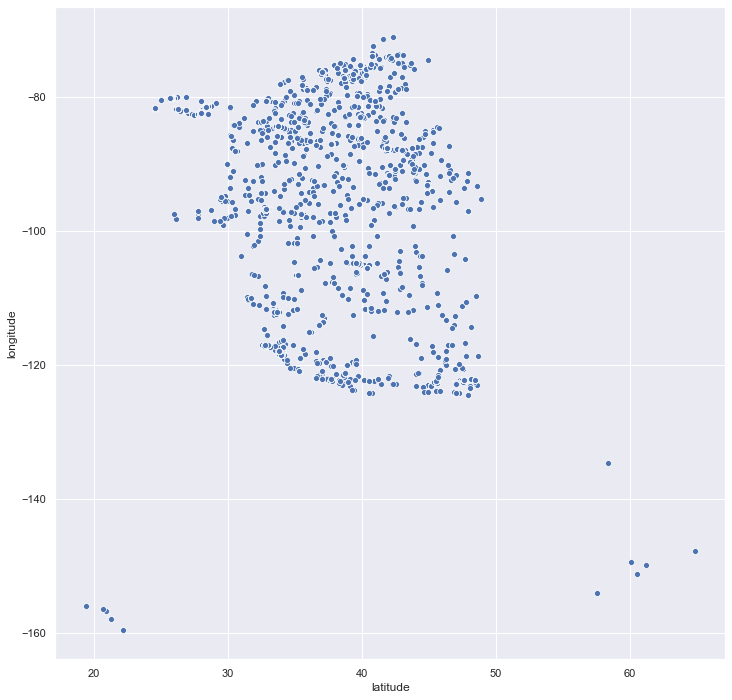

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  
sns.set(rc={'figure.figsize':(12,12)})
sns.scatterplot(x="latitude", y="longitude",data=geoX)

# Identifying the best K value for KMeans.
1. Run mutiple iterations with different K value
2. Plot the Elbow plot to identify K.

In [9]:
#Finding the what is the best fit K-value for clustering the data
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(geoX)
    Sum_of_squared_distances.append(km.inertia_)

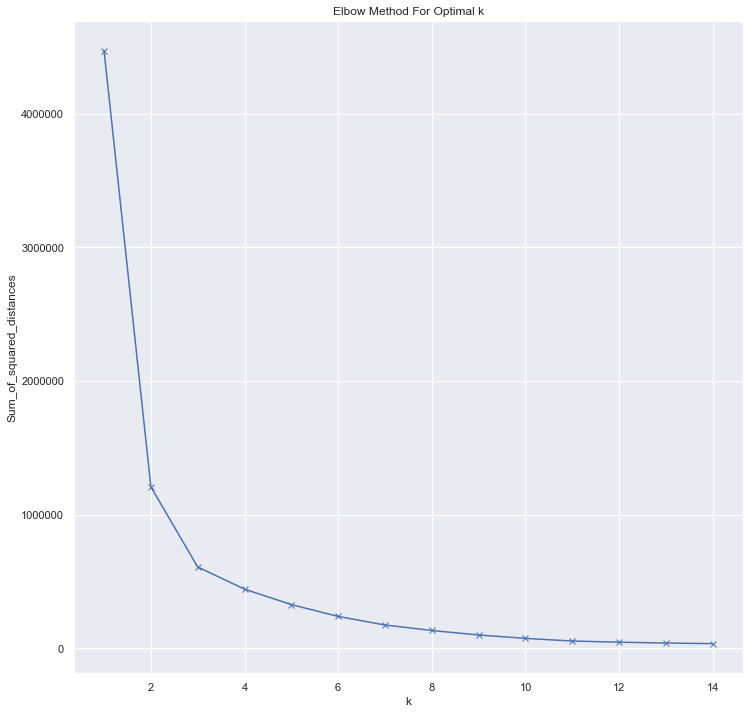

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Applying KMeans with best K-Value Identified
1. Identified K-value as 6. (As there is no much variance in the data)
2. Call KMeans.fit(data) to cluster and label the data
3. Get the centroids of clusters

In [19]:
import random
def get_colors(clusters_count=2):
    '''
    Initialize the color map based on Cluster Count for Visualization
    @return - list of color codes
    '''
    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(clusters_count)]
    return colors

clusters_K = 9
kmeans = KMeans(n_clusters=clusters_K, random_state=0).fit(geoX)
colors = get_colors(clusters_count=clusters_K)

In [12]:

labels = kmeans.labels_
labels

array([1, 8, 8, ..., 6, 6, 4])

# Labelling the data with Cluster  Labels from KMeans.
1. Label the data set with cluster IDS.
2. Get the centroids.
3. Plot the data with labelled data to visualize the clusters.

In [16]:
#Assign the labels for creation of clusters
df_reviews['clusterids'] = kmeans.labels_

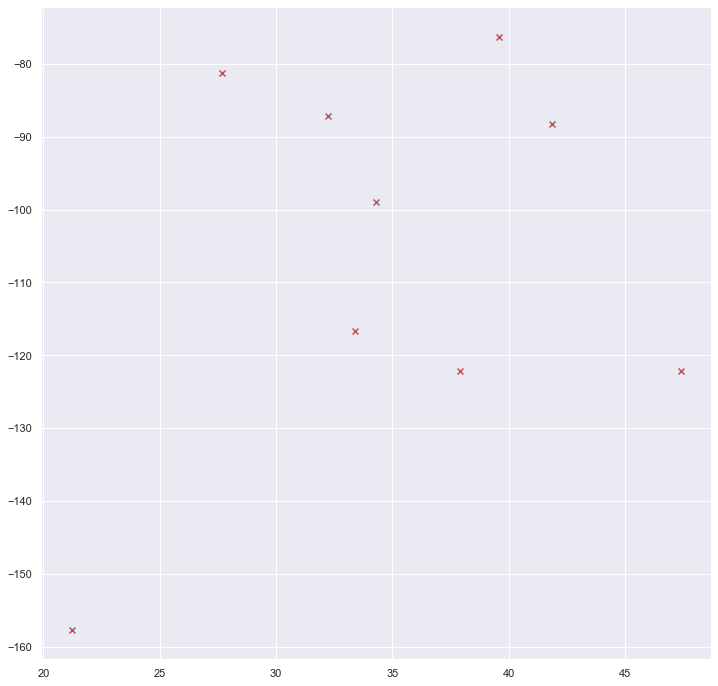

In [23]:
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r')

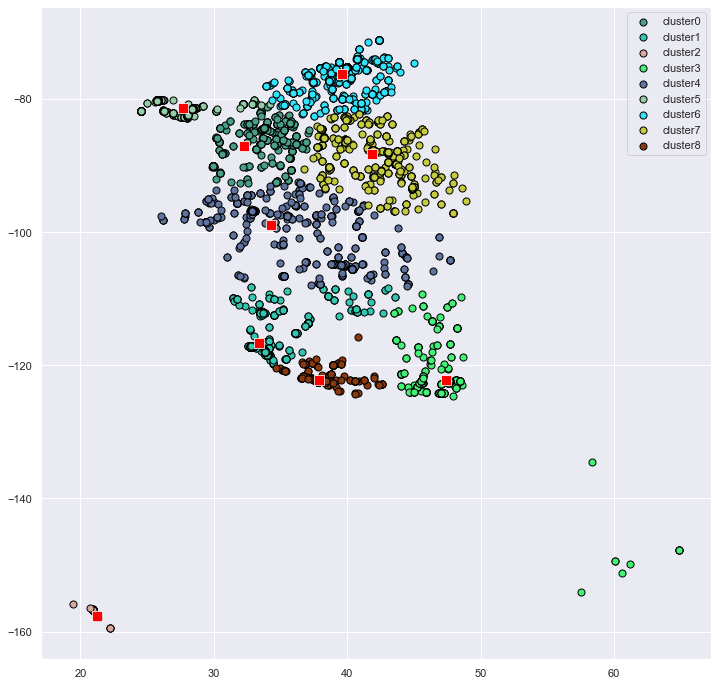

In [24]:
icount = 0
for each_cluster in list(set(kmeans.labels_)):
    x_data = df_reviews[df_reviews['clusterids'] == each_cluster]['latitude']
    y_data = df_reviews[df_reviews['clusterids'] == each_cluster]['longitude']
    plt.scatter(x_data, y_data,
        s=50, c=colors[icount],
        marker='o', edgecolor='black',
        label='cluster'+str(each_cluster)
    )
    icount += 1
sns.scatterplot(centroids[:,0], centroids[:,1], s=100, marker="s", color='red')
plt.show()

In [25]:
df_centroids = pd.DataFrame(centroids)
df_centroids['clusterids'] = list(set(kmeans.labels_))
df_centroids

,0,1,clusterids
0,32.234716,-87.081144,0
1,33.411487,-116.647161,1
2,21.230725,-157.662455,2
3,47.383876,-122.163579,3
4,34.301982,-98.974922,4
5,27.661328,-81.272027,5
6,39.569911,-76.256173,6
7,41.867081,-88.213515,7
8,37.912915,-122.206080,8


In [27]:
df_ratings = pd.DataFrame(df_reviews.groupby(['clusterids','reviews.rating']).size().reset_index())
df_ratings

,clusterids,reviews.rating,0
0,0,1,110
1,0,2,104
2,0,3,220
3,0,4,570
4,0,5,924
5,1,1,87
6,1,2,106
7,1,3,257
8,1,4,601
9,1,5,835


In [28]:
df_rating5 = df_reviews[df_reviews['reviews.rating'] == 5]
df_RA = pd.DataFrame(df_reviews.groupby(['clusterids','reviews.rating']).size().reset_index())
df_RA[df_RA['reviews.rating'] == 5].max()

clusterids          8
reviews.rating      5
0                 924
dtype: int64

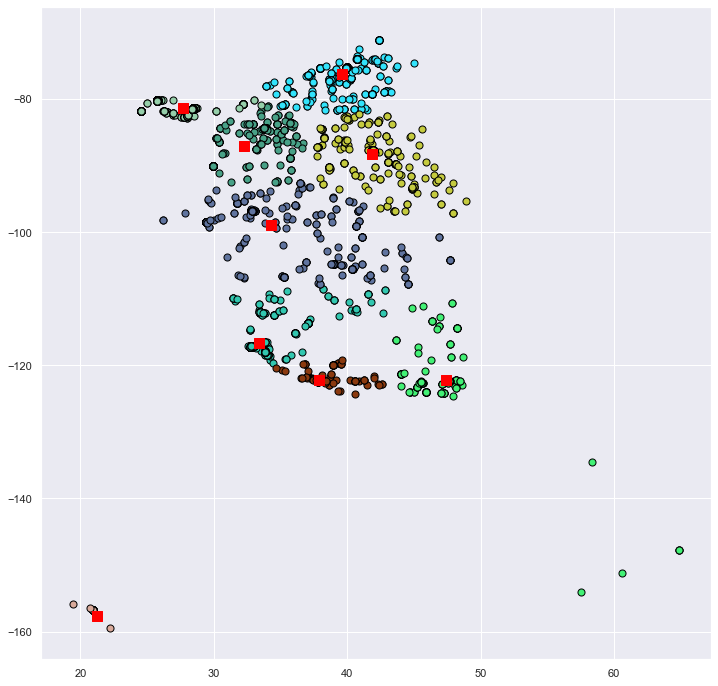

In [29]:
icount = 0
for each_cluster in list(set(kmeans.labels_)):
    x_data = df_rating5[df_rating5['clusterids'] == each_cluster]['latitude']
    y_data = df_rating5[df_rating5['clusterids'] == each_cluster]['longitude']
    plt.scatter(x_data, y_data,
        s=50, c=colors[icount],
        marker='o', edgecolor='black',
        label='cluster'+str(each_cluster)
    )
    icount += 1
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker="s", color='red')
plt.show()

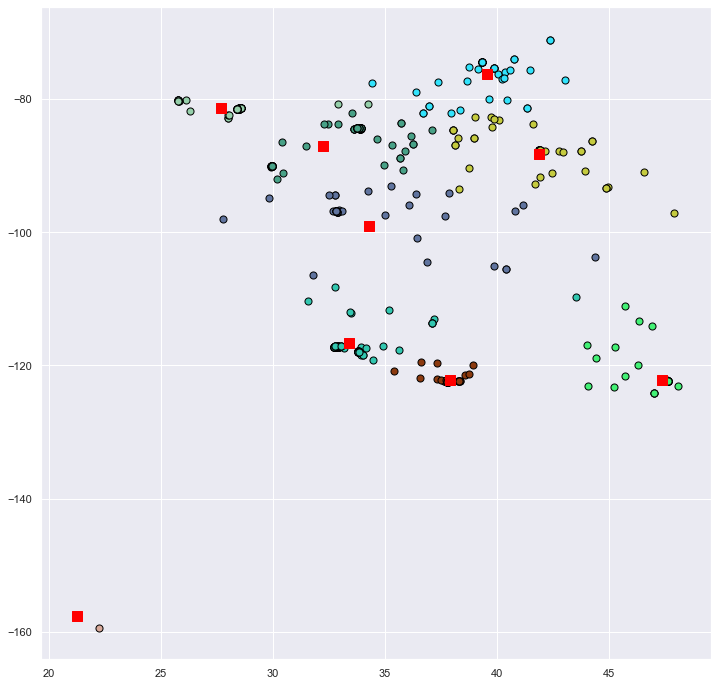

In [30]:
df_rating4 = df_reviews[df_reviews['reviews.rating'] == 2]
icount = 0
for each_cluster in list(set(kmeans.labels_)):
    x_data = df_rating4[df_rating4['clusterids'] == each_cluster]['latitude']
    y_data = df_rating4[df_rating4['clusterids'] == each_cluster]['longitude']
    plt.scatter(x_data, y_data,
        s=50, c=colors[icount],
        marker='o', edgecolor='black',
        label='cluster'+str(each_cluster)
    )
    icount += 1
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker="s", color='red')
plt.show()

In [31]:
df_centroids = df_centroids.rename(columns={0:'latitude',1:'longitude',})
df_final = pd.merge(df_ratings,df_centroids,left_on='clusterids', right_on='clusterids')

In [32]:
df_final.rename(columns={0:'reviews.count'})

,clusterids,reviews.rating,reviews.count,latitude,longitude
0,0,1,110,32.234716,-87.081144
1,0,2,104,32.234716,-87.081144
2,0,3,220,32.234716,-87.081144
3,0,4,570,32.234716,-87.081144
4,0,5,924,32.234716,-87.081144
5,1,1,87,33.411487,-116.647161
6,1,2,106,33.411487,-116.647161
7,1,3,257,33.411487,-116.647161
8,1,4,601,33.411487,-116.647161
9,1,5,835,33.411487,-116.647161


In [33]:
df_cluster5 = df_final[(df_final['reviews.rating']==5) | (df_final['reviews.rating']== 4)]

In [39]:
df_cluster5 = df_cluster5.rename(columns={0:'reviews.count'})
df_cluster5


,clusterids,reviews.rating,reviews.count,latitude,longitude
3,0,4,570,32.234716,-87.081144
4,0,5,924,32.234716,-87.081144
8,1,4,601,33.411487,-116.647161
9,1,5,835,33.411487,-116.647161
13,2,4,129,21.230725,-157.662455
14,2,5,177,21.230725,-157.662455
18,3,4,272,47.383876,-122.163579
19,3,5,468,47.383876,-122.163579
23,4,4,200,34.301982,-98.974922
24,4,5,509,34.301982,-98.974922


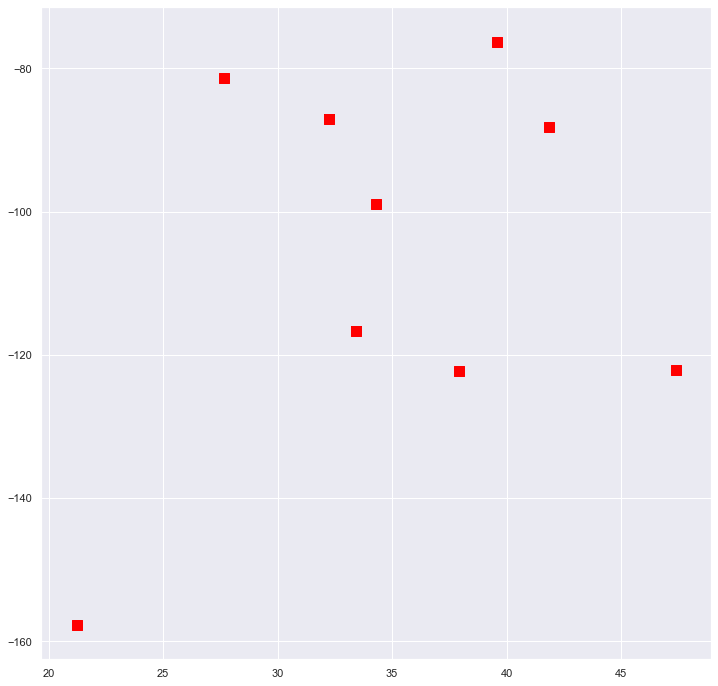

[570,
 924,
 601,
 835,
 129,
 177,
 272,
 468,
 200,
 509,
 301,
 655,
 192,
 410,
 266,
 439,
 318,
 423]

In [58]:
#Plotting the data for reviews having 5 to identify the best living place.
icount = 0
for each_cluster in list(set(kmeans.labels_)):
    x_data = df_cluster5[(df_cluster5['clusterids'] == each_cluster) & (df_cluster5['reviews.rating'] == 5)]['latitude']
    y_data = df_cluster5[(df_cluster5['clusterids'] == each_cluster)  & (df_cluster5['reviews.rating'] == 5)]['longitude']
    plt.scatter(x_data, y_data,
        s=100, c=colors[icount],
        marker='o', edgecolor='black',
        label='cluster'+str(each_cluster)
    )
    
    x_data2 = df_cluster5[df_cluster5['clusterids'] == each_cluster & (df_cluster5['reviews.rating'] == 4)]['latitude']
    y_data2 = df_cluster5[df_cluster5['clusterids'] == each_cluster & (df_cluster5['reviews.rating'] == 4)]['longitude']
    plt.scatter(x_data2, y_data2,
        s=100, c=colors[icount],
        marker='v', edgecolor='black',
        label='cluster'+str(each_cluster)
    )
    icount += 1
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker="s", color='red')

plt.show()
list(df_cluster5['reviews.count'])

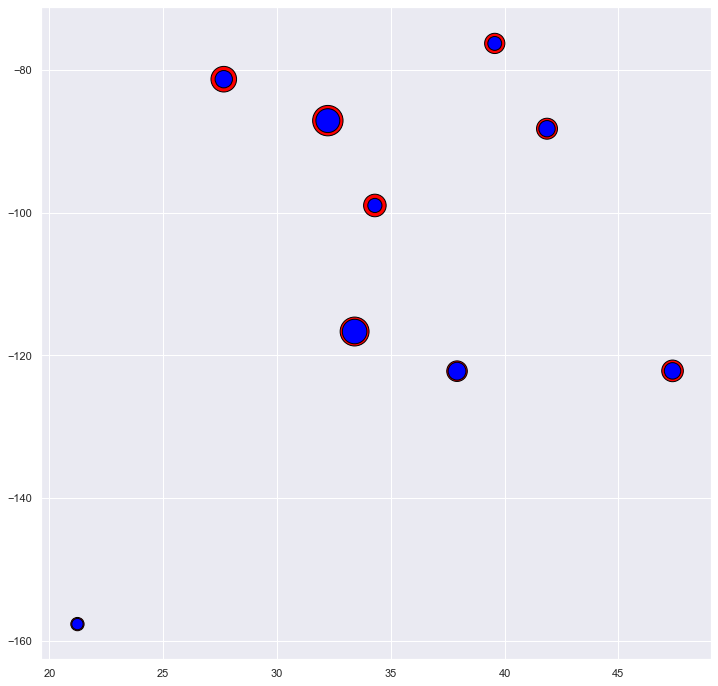

In [55]:
x_data = df_cluster5[(df_cluster5['reviews.rating'] == 5)]['latitude']
y_data = df_cluster5[(df_cluster5['reviews.rating'] == 5)]['longitude']
x_data4 = df_cluster5[(df_cluster5['reviews.rating'] == 4)]['latitude']
y_data4 = df_cluster5[(df_cluster5['reviews.rating'] == 4)]['longitude']
plt.scatter(x_data, y_data, s=list(df_cluster5[(df_cluster5['reviews.rating'] == 5)]['reviews.count']),c='red',marker='o', edgecolor='black')
plt.scatter(x_data4, y_data4, s=list(df_cluster5[(df_cluster5['reviews.rating'] == 4)]['reviews.count']),c='blue',marker='o', edgecolor='black')
plt.show()